# Exercise 5

This week we will practice how to create **static and interactive maps using Python**. The goal of this exercise is to allow you to focus on cartographic visualization with Python, and to play around and explore different possibilities of the available visualization packages.

In this exercise, there is no ready-made Notebook-file to start with. All instructions are given in this readme.md -file and you should create all necessary files for completing the exercise yourself. Your final submission should inlcude a Jupyter Notebook-file (or a Python script file), and the output maps for problems 1 and 2 in `.png` and `.html` format stored in the **`docs`** folder (see instructions below). Finally, you will publish the maps online (problem 3).

- **Exercise 5 is due by 17:00 on Thursday the 9th of December.**

- You can gain 20 points from this exercise. 


## Problem 1: Visualize a static map (8 points)

Create a static map using the skills you leared in lesson 5. The map should contain multiple layers of data (at least two different data sets), and you should pay attention to the classification and visualization (colors, edges etc.) when creating the map. Write your code into a notebook file (`.ipynb`) or a python script file (`.py`) and store the output map(s) in `.png` format into the `docs` folder.

**Topic of the map:**
- You can either use the data sets we have already used during this course (eg. the Travel Time Matrix, or population grid), or you can select some other data set of your interest (for example, statistics in postal code areas).
- Feel free to adapt examples provided in this course! You can do further calculations based on the datasets or use the analysis outputs that we have done earlier in the course (for example, the dominance areas or travel times for shopping centers). 

**Criteria:**
- The map should have multiple layers on it (for example, the travel time matrix and the road network). Basemap is optional (use a basemap only if it adds useful information / visual touch!)
- The map should portray some kind of classification and/or an analysis output (not just the raw data).
- Consider [good cartographic practices](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/) (map extent, zoom level, color choices, legend, credit data sources etc.) when plotting the map.

**Output:**
- Remember to commit the code and input data (or at least a link to input data)
- Save your map(s) as png image in the **`docs`** folder  

In [1]:
# Import needed modules needed in this exercise
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString, Polygon
import contextily as ctx

**DATA USED IN THIS EXERCISE:**

`liikenneonnettomuudet_Helsingissa_2020.csv` 
- traffic accidents located in Helsinki in 2020*
- retrieved from Helsinki Region Infoshare (https://hri.fi/data/fi/dataset/liikenneonnettomuudet-helsingissa) 
- *I edited the data in excel and selected data only for the year 2020, so the file would be smaller when uploading it to Jupyter Notebook

`PKS_Postinumeroalueet_2020.shp` 
- postal code areas of Helsinki metropolitan area in 2020
- retrieved from Helsinki Region Infoshare (https://hri.fi/data/fi/dataset/paakaupunkiseudun-postinumeroalueet)  

`Helsinki_borders.shp` 
- border of Helsinki
- retrieved from course website  

In [2]:
# Read .csv file containing traffic accident information as a geodataframe called accidents, use ';' as seperator
fp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/liikenneonnettomuudet_Helsingissa_2020.csv'
accidents = gpd.read_file(fp, sep=';')
# Read .shp file containing postal areas in Helsinki metropolitan area as a geodataframe called postcodes
fp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/PKS_Postinumeroalueet_2020.shp'
postcodes = gpd.read_file(fp)
# Read .shp file containing border of Helsinki as a geodataframe called helsinki
fp = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/Helsinki_borders.shp'
helsinki = gpd.read_file(fp)

In [3]:
# Check data for accidents
print(accidents)

    LAJI   pohj_etrs     ita_etrs VAKAV_A    VV geometry
0     JK  6676118.59  25497166.92       3  2020     None
1     JK  6680693.22   25499983.9       3  2020     None
2     JK  6671808.97  25494863.41       3  2020     None
3     JK  6678770.06   25496877.4       2  2020     None
4     JK  6672525.14  25497111.09       2  2020     None
..   ...         ...          ...     ...   ...      ...
900   PP  6675744.67  25497629.87       1  2020     None
901   PP  6677299.84  25493728.08       1  2020     None
902   PP  6682419.42  25500949.44       1  2020     None
903   PP   6679137.8  25504722.38       1  2020     None
904   PP  6680168.59  25498122.67       1  2020     None

[905 rows x 6 columns]


In [4]:
# Check data for postcodes
print(postcodes)

     Posno    Toimip    Toimip_ru                           Nimi  \
0    00100  HELSINKI  HELSINGFORS  Helsinki Keskusta - Etu-Töölö   
1    00120  HELSINKI  HELSINGFORS                      Punavuori   
2    00130  HELSINKI  HELSINGFORS                Kaartinkaupunki   
3    00140  HELSINKI  HELSINGFORS       Kaivopuisto - Ullanlinna   
4    00150  HELSINKI  HELSINGFORS              Eira - Hernesaari   
..     ...       ...          ...                            ...   
167  02940     ESPOO         ESBO          Lippajärvi-Järvenperä   
168  02970     ESPOO         ESBO                      Kalajärvi   
169  02980     ESPOO         ESBO                        Lakisto   
170  04260    KERAVA        KERVO                          Savio   
171  04320   TUUSULA        TUSBY                    Riihikallio   

                               Nimi_Ru     Kunta Kunta_nro  \
0    Helsingfors centrum - Främre Tölö  Helsinki       091   
1                            Rödbergen  Helsinki       091 

In [5]:
# Change columns 'pohj_etrs' and 'ita_etrs' type in the accidents df as float to be able to change them to Shapely Point values
accidents['pohj_etrs'] = accidents['pohj_etrs'].astype(float)
accidents['ita_etrs'] = accidents['ita_etrs'].astype(float)

# Create a new list "coords" where to add the new Points
coords = []

# Use a for-loop to iterate over the rows in the accidents df and change the columns as Point values
for idx, row in accidents.iterrows():
    points = Point((row['ita_etrs']), (row['pohj_etrs'])) 
    coords.append(points)
    
# Add the coords list of points to the geometry column
accidents['geometry'] = coords

In [6]:
# Check the data that the geometry is displayed correctly
print(accidents)

    LAJI   pohj_etrs     ita_etrs VAKAV_A    VV  \
0     JK  6676118.59  25497166.92       3  2020   
1     JK  6680693.22  25499983.90       3  2020   
2     JK  6671808.97  25494863.41       3  2020   
3     JK  6678770.06  25496877.40       2  2020   
4     JK  6672525.14  25497111.09       2  2020   
..   ...         ...          ...     ...   ...   
900   PP  6675744.67  25497629.87       1  2020   
901   PP  6677299.84  25493728.08       1  2020   
902   PP  6682419.42  25500949.44       1  2020   
903   PP  6679137.80  25504722.38       1  2020   
904   PP  6680168.59  25498122.67       1  2020   

                             geometry  
0    POINT (25497166.920 6676118.590)  
1    POINT (25499983.900 6680693.220)  
2    POINT (25494863.410 6671808.970)  
3    POINT (25496877.400 6678770.060)  
4    POINT (25497111.090 6672525.140)  
..                                ...  
900  POINT (25497629.870 6675744.670)  
901  POINT (25493728.080 6677299.840)  
902  POINT (25500949.440 66

In [7]:
# Choose only certain columns from the postcodes df
postcodes = postcodes[['Posno', 'Kunta', 'Nimi', 'geometry']]

In [8]:
# Check crs for accidents df and postcodes df
print(accidents.crs)
print(postcodes.crs)

None
PROJCS["ETRS89_ETRS_GK25FIN_2010",GEOGCS["ETRS89",DATUM["European_Terrestrial_Reference_System_1989",SPHEROID["Geodetic_Reference_System_of_1980",6378137,298.257222100892],AUTHORITY["EPSG","6258"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4258"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",25],PARAMETER["scale_factor",1],PARAMETER["false_easting",25500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [9]:
# Define crs
accidents.crs = CRS.from_epsg(3879)
# Set crs for the accidents df to epsg 3879
accidents = accidents.set_crs(epsg=3879)
print(accidents.crs)

epsg:3879


In [10]:
# Reproject all the df to EPSG 3857 and create copy of old crs
helsinki_oldcrs = helsinki.copy()
helsinki = helsinki.to_crs(epsg=3857)
postcodes_oldcrs = postcodes.copy()
postcodes = postcodes.to_crs(epsg=3857)
accidents_oldcrs = accidents.copy()
accidents = accidents.to_crs(epsg=3857)

In [11]:
# Check if crs match with all the df
accidents.crs == postcodes.crs == helsinki.crs

True

In [12]:
# Create new column 'number_of_accidents', each row represents one accident, so add number 1 on each row
accidents['number_of_accidents'] = 1
# Check the data
print(accidents)

    LAJI   pohj_etrs     ita_etrs VAKAV_A    VV  \
0     JK  6676118.59  25497166.92       3  2020   
1     JK  6680693.22  25499983.90       3  2020   
2     JK  6671808.97  25494863.41       3  2020   
3     JK  6678770.06  25496877.40       2  2020   
4     JK  6672525.14  25497111.09       2  2020   
..   ...         ...          ...     ...   ...   
900   PP  6675744.67  25497629.87       1  2020   
901   PP  6677299.84  25493728.08       1  2020   
902   PP  6682419.42  25500949.44       1  2020   
903   PP  6679137.80  25504722.38       1  2020   
904   PP  6680168.59  25498122.67       1  2020   

                            geometry  number_of_accidents  
0    POINT (2777301.365 8443922.215)                    1  
1    POINT (2782954.917 8453126.577)                    1  
2    POINT (2772690.411 8435258.596)                    1  
3    POINT (2776715.766 8449253.941)                    1  
4    POINT (2777194.998 8436701.710)                    1  
..                         

In [13]:
# Make a spatial join between postcodes and accidents, join the data from accidents df which intersects with postcodes df 
# (in other words, include points that intersect with postcode polygons within the polygons) 
join = gpd.sjoin(postcodes, accidents, how="inner", op="intersects")
# Check the data
print(join)

    Posno     Kunta                           Nimi  \
0   00100  Helsinki  Helsinki Keskusta - Etu-Töölö   
0   00100  Helsinki  Helsinki Keskusta - Etu-Töölö   
0   00100  Helsinki  Helsinki Keskusta - Etu-Töölö   
0   00100  Helsinki  Helsinki Keskusta - Etu-Töölö   
0   00100  Helsinki  Helsinki Keskusta - Etu-Töölö   
..    ...       ...                            ...   
82  00980  Helsinki                 Etelä-Vuosaari   
82  00980  Helsinki                 Etelä-Vuosaari   
82  00980  Helsinki                 Etelä-Vuosaari   
82  00980  Helsinki                 Etelä-Vuosaari   
82  00980  Helsinki                 Etelä-Vuosaari   

                                             geometry  index_right LAJI  \
0   POLYGON ((2773791.272 8439169.477, 2773821.050...          705   MA   
0   POLYGON ((2773791.272 8439169.477, 2773821.050...          695   MA   
0   POLYGON ((2773791.272 8439169.477, 2773821.050...          222   MA   
0   POLYGON ((2773791.272 8439169.477, 2773821.050.

In [14]:
# Group data by the postal numbers, column called 'Posno'
grouped = join.groupby(['Posno'])

# Create an empty dataframe where to store the total number of accidents based on each postal code number
accidents_total = gpd.GeoDataFrame()

# Use a for-loop to iterate over the groups made from postal numbers and calculate using the .sum() function
for key, group in grouped:
    acc_sum = group[['number_of_accidents']].sum()
    acc_sum['Posno'] = key
    accidents_total = accidents_total.append(acc_sum, ignore_index=True)

# Check the data
accidents_total.head()  

,Posno,number_of_accidents
0,00100,49.0
1,00120,13.0
2,00130,8.0
3,00140,4.0
4,00150,9.0


In [15]:
# Merge the 'accidents_total' with 'postcodes' to get the geometry data into the df, name as 'accidents'
accidents = accidents_total.merge(postcodes, on='Posno')
# Check the data
accidents.head()

,Posno,number_of_accidents,Kunta,Nimi,geometry
0,00100,49.0,Helsinki,Helsinki Keskusta - Etu-Töölö,"POLYGON ((2773791.272 8439169.477, 2773821.050..."
1,00120,13.0,Helsinki,Punavuori,"POLYGON ((2776412.005 8437059.810, 2776427.513..."
2,00130,8.0,Helsinki,Kaartinkaupunki,"POLYGON ((2776523.204 8437156.887, 2777540.303..."
3,00140,4.0,Helsinki,Kaivopuisto - Ullanlinna,"POLYGON ((2777238.083 8435678.120, 2777249.939..."
4,00150,9.0,Helsinki,Eira - Hernesaari,"POLYGON ((2776914.653 8433912.767, 2776571.808..."


(2751000.0, 2815000.0)

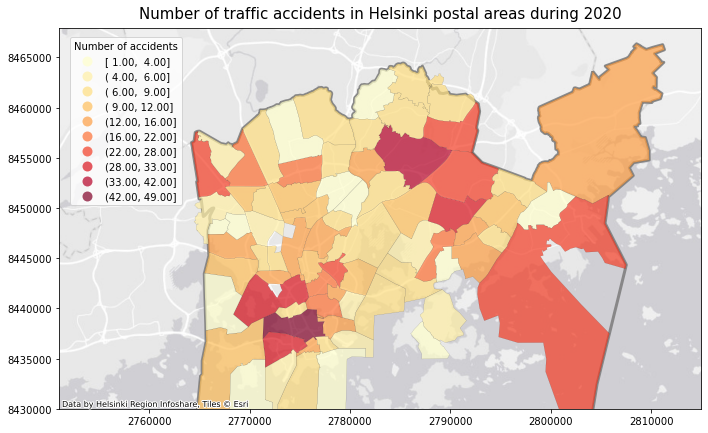

In [16]:
# Create a figure with multiple layers
fig, ax = plt.subplots(figsize=(21, 7))
# Plot the helsinki borders
helsinki.plot(ax=ax, linewidth=3, alpha=0.9, facecolor="none", edgecolor='grey')
# Plot the accidents data, set column as 'number_of_accidents', set an appropriate scheme and number of classes (k=10)
accidents.plot(ax=ax, cmap='YlOrRd', scheme="Natural_Breaks", column = "number_of_accidents", k=10, legend=True, 
               alpha=0.7, markersize=130, edgecolor='black', linewidth=0.1)
# Remove 1e6 (scientific notation)
ax.ticklabel_format(style='plain')
# Add credits
credits = "Data by Helsinki Region Infoshare, Tiles © Esri"
# Add basemap from Esri
ctx.add_basemap(ax, attribution=credits, source=ctx.providers.Esri.WorldGrayCanvas)
# Set the title of figure
ax.set_title("Number of traffic accidents in Helsinki postal areas during 2020", fontsize=15, pad=10)
# Set title for legend
ax.get_legend().set_title("Number of accidents")
# Reposition the legend
ax.get_legend().set_bbox_to_anchor((0.2,0.99))
# Crop the figure
ax.set_ylim(8430000, 8467900)
ax.set_xlim(2751000, 2815000)

In [17]:
# Save figure, remove empty space around figure with bbox_inches and pad_inches
output_fig1 = r'/home/jovyan/work/autogis/exercises/exercise-5-chtimmer/docs/traffic_accidents.png'
fig.savefig(output_fig1, bbox_inches = 'tight', pad_inches = 0.2)

### Summary of the expected outputs

- At least 1 static map in `.png` format stored in the `docs`-folder (problem 1)
- At least 1 interactive map in `.html` format stored in the `docs`-folder (problem 2)
- All codes (`.ipynb` or `.py` -files) and input data (or links to input data) provided in this exercise-5 repository 
- Optional: Published maps at: `https://autoGIS-2021.github.io/exercise-5-YourGitHubUsername/filename*` containing online versions of your interactive and static maps (problem 3) 
- Optional: Links to the published maps stored in the [**docs/index.md -file**](docs/index.md) (problem 3)

For both maps, think a bit about the audience of the map, and pay attention to your cartographic choices. Check out [this blog post for further hints on creating good maps](https://www.gislounge.com/ten-things-to-consider-when-making-a-map/). 